In [2]:
import os
from river import evaluate, metrics, neighbors, stream


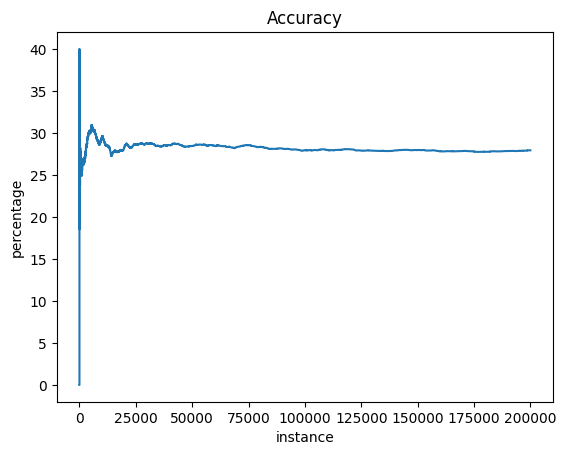

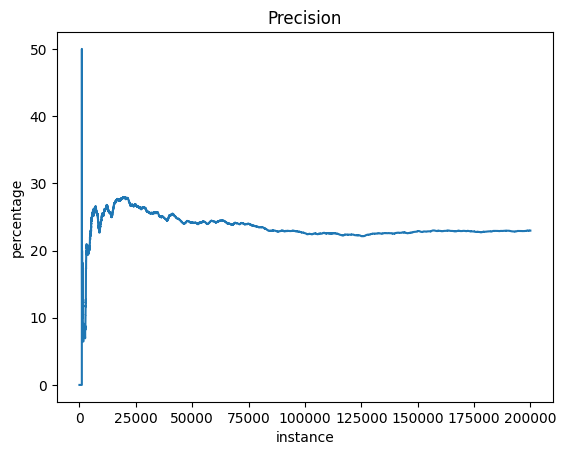

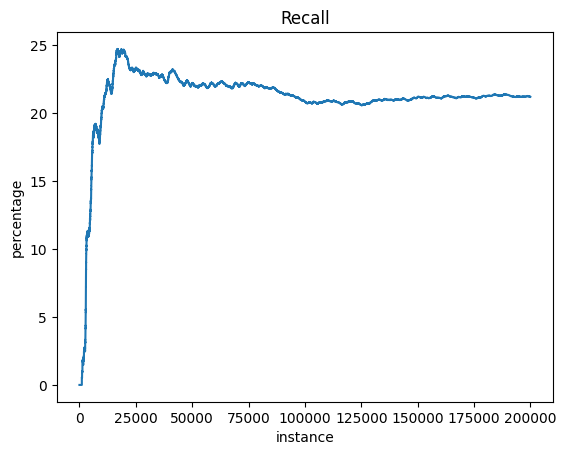

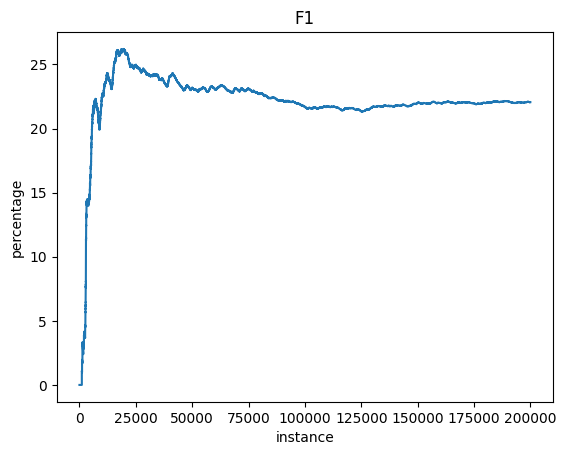

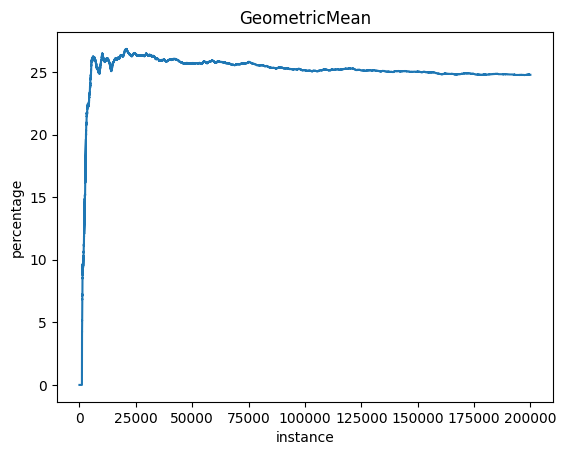

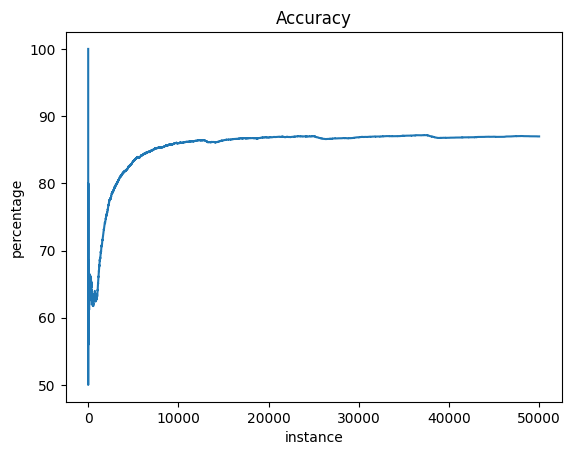

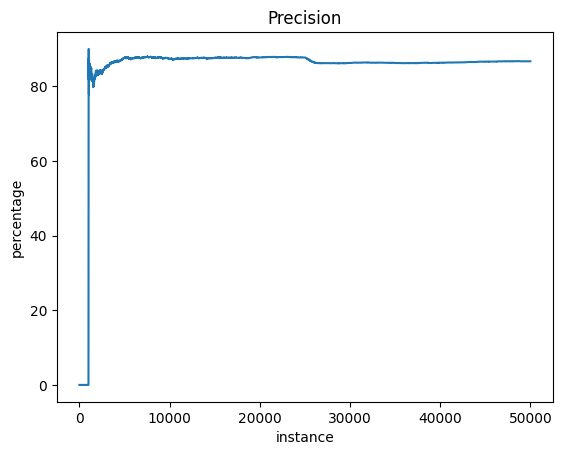

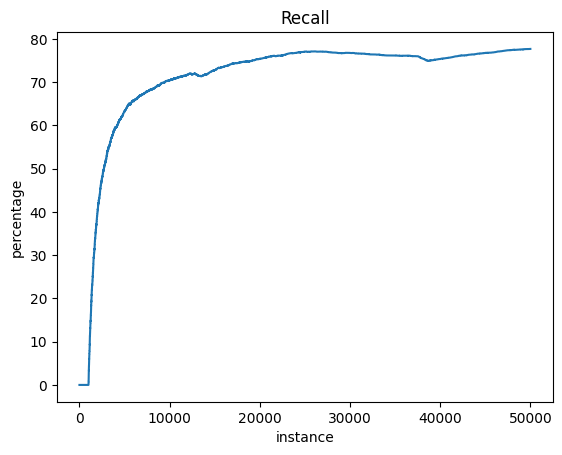

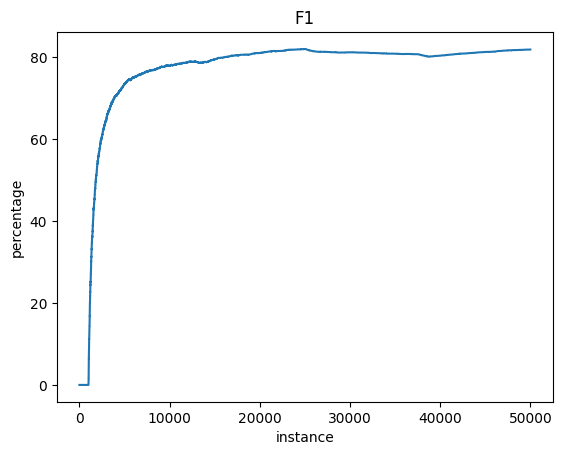

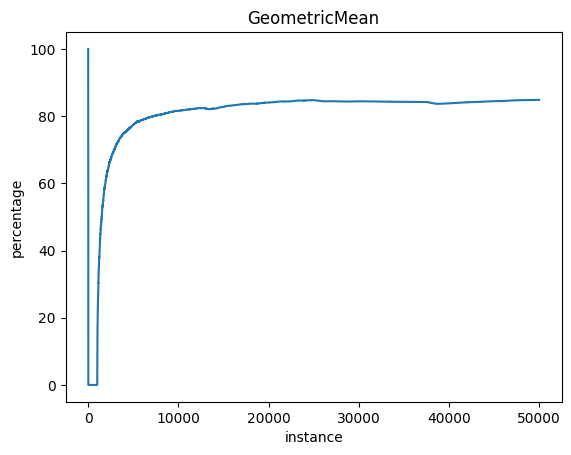

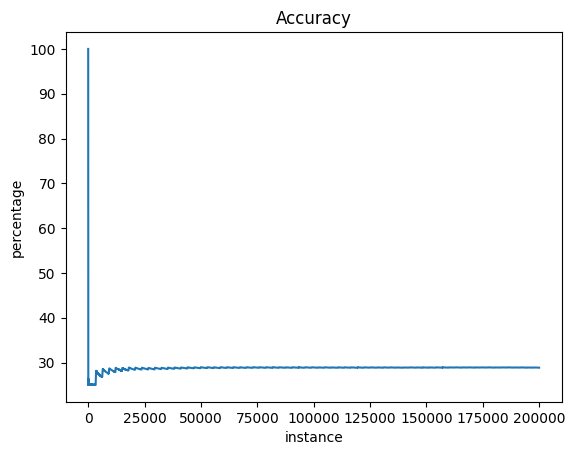

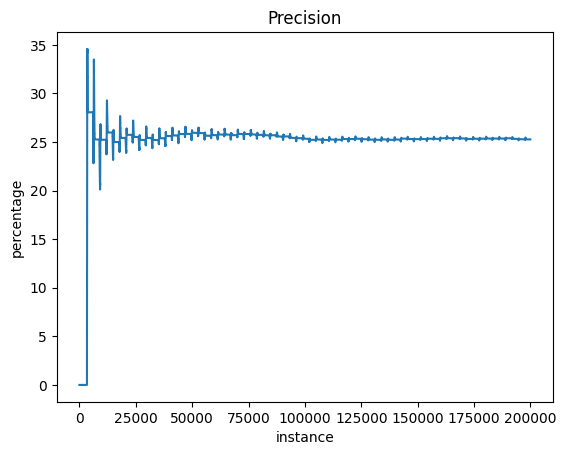

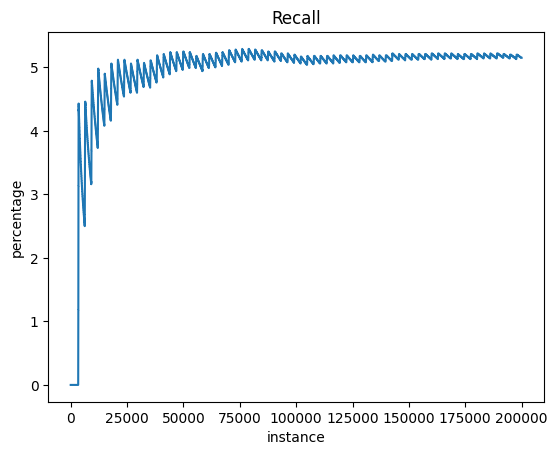

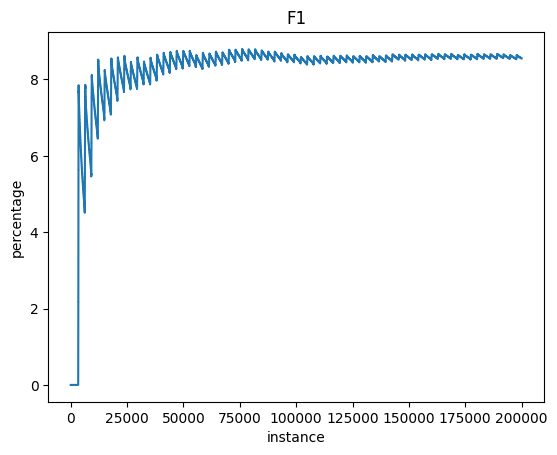

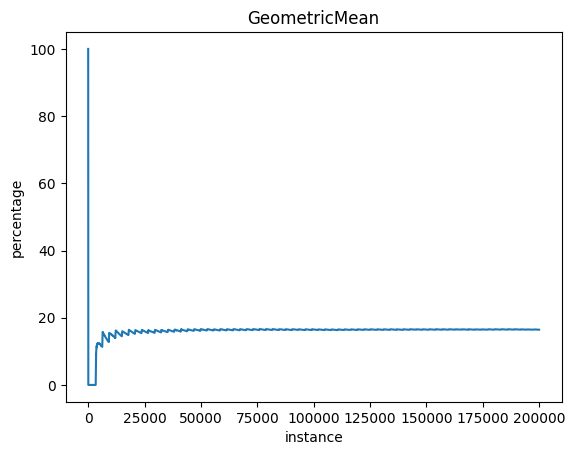

In [44]:
# o iter_csv lê os dados do arquivo como string, por essa 
# razão é necessário converter os dados para tipos numéricos
bases = {
    #'chess': {
    #    'converter': {
    #        'x':float, 'y': float, 'labels':int}, 
    #    'target' : 'labels', 
    #    'drop': None}, 
    'rbf': {
        'converter': {
            'x0':float, 'x1':float, 'x2':float, 'x3':float, 
            'x4':float, 'x5':float, 'x6':float, 'x7':float, 
            'x8':float, 'x9':float, 'labels':int}, 
        'target' : 'labels', 
        'drop': None}, 
    'sea': {
        'converter': {
            'x':float, 'y': float, 'labels':int}, 
        'target' : 'labels', 
        'drop': ['z']},
    'squares': {
        'converter': {
            'x':float, 'y': float, 'labels':int}, 
        'target' : 'labels', 
        'drop': None}
}

all_metrics = [
    'Accuracy', 
    'Precision', 
    'Recall',
    'F1',
    'GeometricMean']

for b in bases:
    for m in all_metrics:

        dataset = stream.iter_csv(
            f'artificial/{b}/{b}.csv', 
            converters=bases[b]['converter'], 
            target=bases[b]['target'],
            drop=bases[b]['drop'],)

        # o modelo SAMKNNClassifier foi adicionado manualmente ao river
        # a partir do código disponível na versão 0.10.1, por razões
        # internas do river, o modelo não foi adicionado às demais versões
        model = neighbors.SAMKNNClassifier(
            window_size=1000, 
            n_neighbors=3)


        delay = 1000

        os.makedirs(f'artificial/{b}/', exist_ok=True)
        with open(f'artificial/{b}/{m}.csv', 'w') as f:
            eval = evaluate.progressive_val_score(
                dataset, 
                model, 
                metric=getattr(metrics, m)(),
                delay=delay, 
                print_every=1, 
                file=f)

        try:
            reader = open(f'artificial/{b}/{m}.csv', 'r')
            dicti = {}
            Lines = reader.readlines()
            for row in Lines:
                colunas = row.split()
                n_answer = int(colunas[0].strip('[]').replace(',',''))
                metric_title = colunas[1].strip(':')
                percentage = float(colunas[2].strip('%'))
                if dicti.get(metric_title) is None: 
                    dicti[metric_title] = {}
                dicti[metric_title].update({n_answer :percentage})
        except OSError:
            print ('Could not open/read file:', file)
            exit()

        import matplotlib.pyplot as plt

        for metric_key in dicti.keys():
            plt.figure()
            plt.title(metric_key)
            plt.xlabel('instance')
            plt.ylabel('percentage')
            plt.plot(dicti[metric_key].keys(), dicti[metric_key].values())
            plt.savefig(f'artificial/{b}/{m}.png')